In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/creditcard.csv")   # adjust path if needed
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Cell 2: Dataset Info
print("Shape:", df.shape)
print("\n--- Data Types ---")
print(df.dtypes.head())
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())
print("\nFraudulent transactions: {:.4f}%".format(df['Class'].mean()*100))


Shape: (284807, 31)

--- Data Types ---
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
dtype: object

--- Class Distribution ---
Class
0    284315
1       492
Name: count, dtype: int64

Fraudulent transactions: 0.1727%


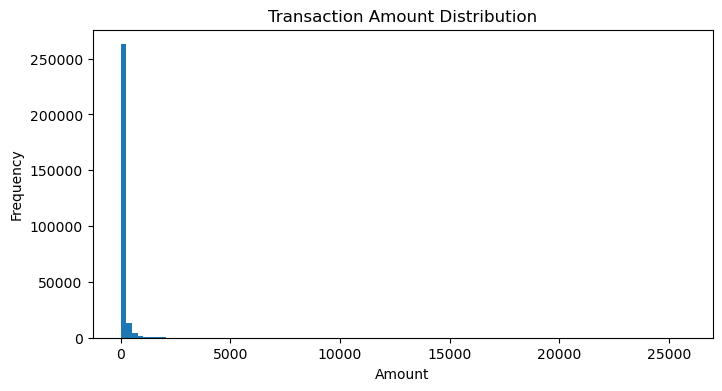

In [3]:
# Cell 3: Transaction Amount distribution
plt.figure(figsize=(8,4))
df['Amount'].plot(kind='hist', bins=100, title='Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


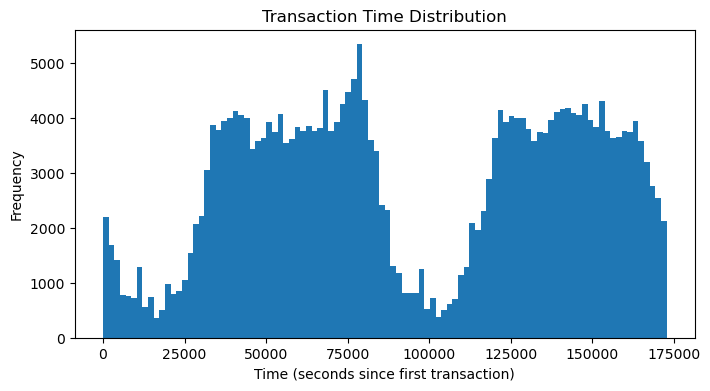

In [4]:
# Cell 4: Transaction Time distribution
plt.figure(figsize=(8,4))
df['Time'].plot(kind='hist', bins=100, title='Transaction Time Distribution')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()


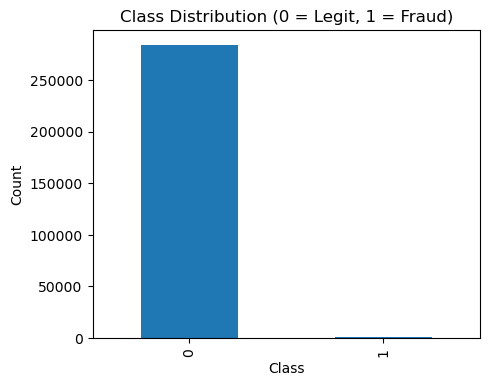

In [5]:
# Cell 5: Fraud vs Non-Fraud counts
plt.figure(figsize=(5,4))
df['Class'].value_counts().plot(kind='bar', title='Class Distribution (0 = Legit, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


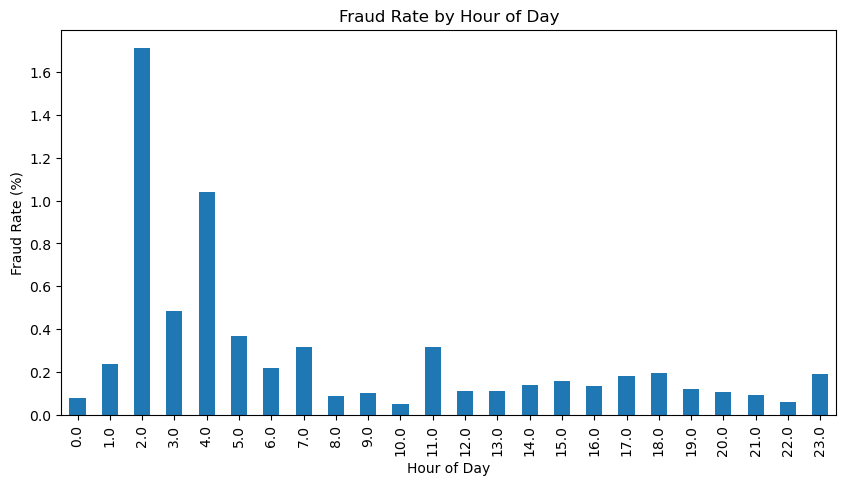

In [6]:
# Cell 6: Fraud rate by hour of day
df['hour'] = (df['Time'] // 3600) % 24
fraud_rate = df.groupby('hour')['Class'].mean() * 100

plt.figure(figsize=(10,5))
fraud_rate.plot(kind='bar', title='Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.show()
